# Ams weather exploration

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import scienceplots
plt.style.use(['science'])
from sklearn.preprocessing import MinMaxScaler

## Load data

In [55]:
fname_ams_weather='../data/nl/ams_weather_data.txt'
df_ams_weather=pd.read_csv( fname_ams_weather,  
    skipinitialspace=True,  # ignore spaces after comma separator
    header=14,  # row with column names
    usecols=['YYYYMMDD','HH','Q','T','N','RH','FH','N'],  # columns to use
)

# HH: hour of the day
# - **Q:**  Global radiation (in J/cm2) during the hourly division
# - **T:**: Temperature (in 0.1 degrees Celsius) at 1.50 m at the time of observation
# - **N:** Cloud cover (in octants); at the time of observation (9=sky invisible)
# - **RH:** Hourly precipitation amount (in 0.1 mm) (-1 for <0.05 mm)
# - **FH:** Hourly mean wind speed (in 0.1 m/s)

In [56]:
df_ams_weather.head(30)

,YYYYMMDD,HH,FH,T,Q,RH,N
0,20170401,1,30,76,0,0,0
1,20170401,2,20,73,0,0,2
2,20170401,3,10,72,0,0,4
3,20170401,4,30,84,0,0,8
4,20170401,5,20,71,0,0,8
5,20170401,6,30,92,4,0,8
6,20170401,7,40,113,15,0,8
7,20170401,8,40,121,39,0,8
8,20170401,9,50,117,45,-1,8
9,20170401,10,40,110,24,1,8


In [57]:
df_ams_weather.shape

(17520, 7)

In [58]:
# Rename the columns so that they are easier to read
# HH->HoD
# Q->irradiance
# T->temperature
# N->cloud_cover
# RH->precipitation
# FH->wind_speed
df_ams_weather.rename(columns={
    'HH':'HoD',
    'Q':'irradiance',
    'T':'temperature',
    'N':'cloud_cover',
    'RH':'precipitation',
    'FH':'wind_speed'
}, inplace=True)


In [59]:
df_ams_weather.head(30)

,YYYYMMDD,HoD,wind_speed,temperature,irradiance,precipitation,cloud_cover
0,20170401,1,30,76,0,0,0
1,20170401,2,20,73,0,0,2
2,20170401,3,10,72,0,0,4
3,20170401,4,30,84,0,0,8
4,20170401,5,20,71,0,0,8
5,20170401,6,30,92,4,0,8
6,20170401,7,40,113,15,0,8
7,20170401,8,40,121,39,0,8
8,20170401,9,50,117,45,-1,8
9,20170401,10,40,110,24,1,8


## Align the data with ams energy data
1. Change HoD column from 1-indexed to 0-indexed.
2. add a datetime column

In [60]:
# Change HoD column from 1-indexed to 0-indexed.
df_ams_weather['HoD'] = df_ams_weather['HoD'] - 1

In [61]:
## add a datetime column. Make sure that HoD is 0-indexed before adding.
df_ams_weather['datetime'] = pd.to_datetime(df_ams_weather['YYYYMMDD'].astype(str) + df_ams_weather['HoD'].astype(str).str.zfill(2), format='%Y%m%d%H')
## remove YYYYMMDD and HH columns
df_ams_weather.drop(columns=['YYYYMMDD'], inplace=True)

In [62]:
df_ams_weather.head(30)

,HoD,wind_speed,temperature,irradiance,precipitation,cloud_cover,datetime
0,0,30,76,0,0,0,2017-04-01 00:00:00
1,1,20,73,0,0,2,2017-04-01 01:00:00
2,2,10,72,0,0,4,2017-04-01 02:00:00
3,3,30,84,0,0,8,2017-04-01 03:00:00
4,4,20,71,0,0,8,2017-04-01 04:00:00
5,5,30,92,4,0,8,2017-04-01 05:00:00
6,6,40,113,15,0,8,2017-04-01 06:00:00
7,7,40,121,39,0,8,2017-04-01 07:00:00
8,8,50,117,45,-1,8,2017-04-01 08:00:00
9,9,40,110,24,1,8,2017-04-01 09:00:00


In [63]:
def add_datetime_columns(df):   
    # add day of week, day of year, month,and year as columns, for easier data manipulation and further analysis
    df['dow'] = df['datetime'].dt.dayofweek
    df['doy'] = df['datetime'].dt.dayofyear
    df['month'] = df['datetime'].dt.month
    df['year'] = df['datetime'].dt.year
    # move these 3 columns to the front, and keep time stamp and datetime at the very front
    cols_to_move = ['HoD','dow','doy','month','year']
    cols_to_keep = ['datetime']
    df=df[cols_to_keep +cols_to_move + [ col for col in df.columns if col not in cols_to_move+cols_to_keep ] ]
    return df
df_ams_weather = add_datetime_columns(df_ams_weather)

In [64]:
df_ams_weather.head(30)

,datetime,HoD,dow,doy,month,year,wind_speed,temperature,irradiance,precipitation,cloud_cover
0,2017-04-01 00:00:00,0,5,91,4,2017,30,76,0,0,0
1,2017-04-01 01:00:00,1,5,91,4,2017,20,73,0,0,2
2,2017-04-01 02:00:00,2,5,91,4,2017,10,72,0,0,4
3,2017-04-01 03:00:00,3,5,91,4,2017,30,84,0,0,8
4,2017-04-01 04:00:00,4,5,91,4,2017,20,71,0,0,8
5,2017-04-01 05:00:00,5,5,91,4,2017,30,92,4,0,8
6,2017-04-01 06:00:00,6,5,91,4,2017,40,113,15,0,8
7,2017-04-01 07:00:00,7,5,91,4,2017,40,121,39,0,8
8,2017-04-01 08:00:00,8,5,91,4,2017,50,117,45,-1,8
9,2017-04-01 09:00:00,9,5,91,4,2017,40,110,24,1,8


## Convert data to SI units

### Convert Irradiance

$$ \dfrac{J}{cm^2*h} = \dfrac{W*s}{m^2/10^4 * 3600*s} = \dfrac{10^4*W}{3600*m^2 } $$

In [65]:
# convert Global radiation (J/cm2/h) to irradiance W/m2
df_ams_weather['irradiance']=df_ams_weather['irradiance']*1e4/3600

To verify the conversion of solar irradiance, by comparing the solar irradiance values with another source.
\
https://www.knmi.nl/research/observations-data-technology/projects/forecast-of-solar-radiation-in-the-netherlands-1f0f3816-0854-47a6-9766-42cba229d8fb \
The following figure shows solar irradiance on four days 2017-5-13, 2017-5-14, 2017-5-09,2017-5-10.
<img src='https://knmi-wwwknminl-prd.s3.eu-west-1.amazonaws.com/system/data_center_projects/image2s/000/000/132/xlarge/Fig2_Knap.jpg?1495117254' alt='knmi' width='600'>

In [66]:
# the doy of 20170509,20170510, 20170513, 20170514, search in df_ams_weather
dates = ['2017-05-09 00:00:00', '2017-05-10 00:00:00', '2017-05-13 00:00:00', '2017-05-14 00:00:00']
for date in dates:
    print(df_ams_weather[df_ams_weather['datetime'] == date]['doy'])

912    129
Name: doy, dtype: int32
936    130
Name: doy, dtype: int32
1008    133
Name: doy, dtype: int32
1032    134
Name: doy, dtype: int32


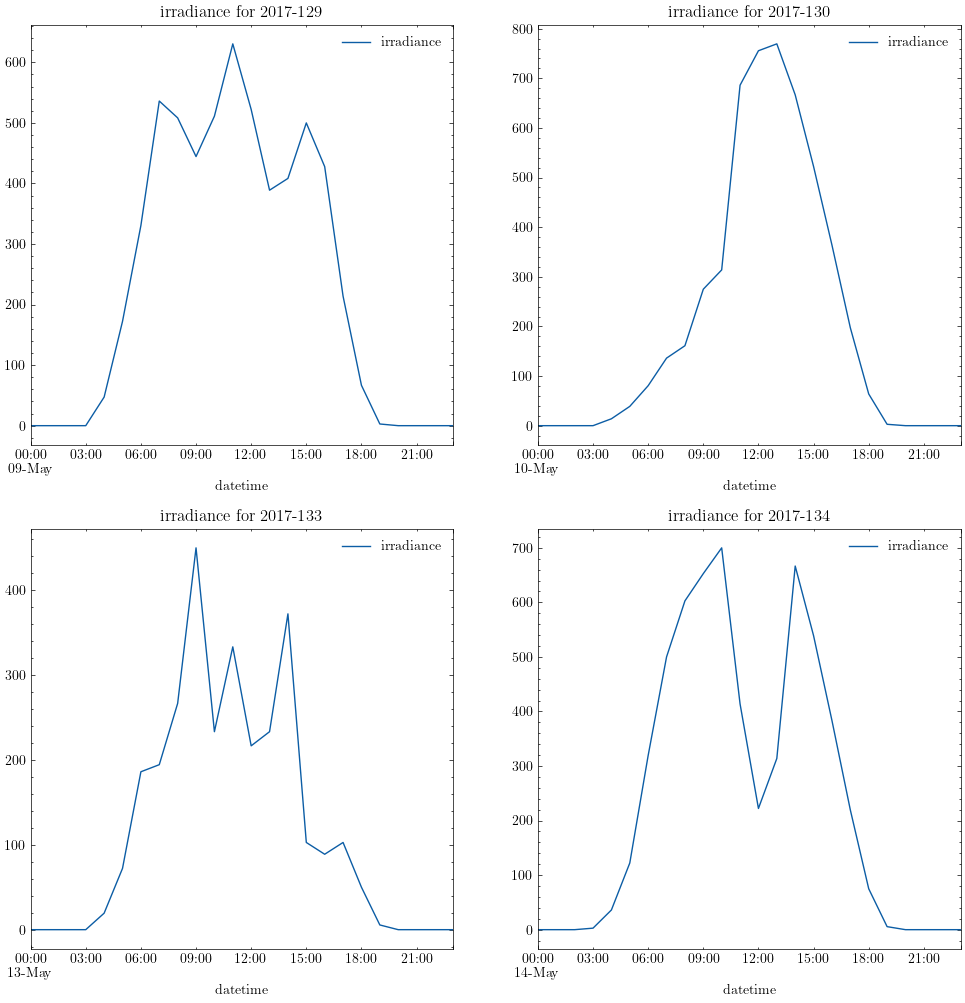

In [67]:
# Plot  irradiance for 20170509,20170510, 20170513, 20170514 in a figure with 4 subplots.
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
dates = [129, 130, 133, 134]
for i, date in enumerate(dates):
    df_ams_weather[ (df_ams_weather['doy'] == date) & (df_ams_weather['year'] == 2017)].plot(x='datetime', y='irradiance', ax=axs[i//2, i%2], title=f'irradiance for 2017-{date}')
plt.show()


The order of magnitude and the shape match. Therrfore, the conversion is correct.

### Convert Temperature

In [68]:
# Convert temperature from 0.1 degrees Celsius to 1 degrees Celsius
df_ams_weather['temperature']=df_ams_weather['temperature']/10

### Convert Precipitation


In [69]:
# because for Hourly precipitation amount (in 0.1 mm), -1 for <0.05 mm
# replace -1 to 0.05/2=0.025
df_ams_weather['precipitation']=df_ams_weather['precipitation'].replace(-1, 0.025)

In [70]:
# Convert precipitation from 0.1 mm/h to 1mm/h
df_ams_weather['precipitation']=df_ams_weather['precipitation']/10

In [71]:
df_ams_weather.head(30)

,datetime,HoD,dow,doy,month,year,wind_speed,temperature,irradiance,precipitation,cloud_cover
0,2017-04-01 00:00:00,0,5,91,4,2017,30,7.6,0.000000,0.0000,0
1,2017-04-01 01:00:00,1,5,91,4,2017,20,7.3,0.000000,0.0000,2
2,2017-04-01 02:00:00,2,5,91,4,2017,10,7.2,0.000000,0.0000,4
3,2017-04-01 03:00:00,3,5,91,4,2017,30,8.4,0.000000,0.0000,8
4,2017-04-01 04:00:00,4,5,91,4,2017,20,7.1,0.000000,0.0000,8
5,2017-04-01 05:00:00,5,5,91,4,2017,30,9.2,11.111111,0.0000,8
6,2017-04-01 06:00:00,6,5,91,4,2017,40,11.3,41.666667,0.0000,8
7,2017-04-01 07:00:00,7,5,91,4,2017,40,12.1,108.333333,0.0000,8
8,2017-04-01 08:00:00,8,5,91,4,2017,50,11.7,125.000000,0.0025,8
9,2017-04-01 09:00:00,9,5,91,4,2017,40,11.0,66.666667,0.1000,8


### Convert wind speed

In [72]:
# Convert wind speed from 0.1 m/s to m/s
df_ams_weather['wind_speed']=df_ams_weather['wind_speed']*0.1

## Explore columns

In [73]:
df_ams_weather.describe()

,datetime,HoD,dow,doy,month,year,wind_speed,temperature,irradiance,precipitation,cloud_cover
count,17520,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2018-03-31 23:30:00,11.500000,3.006849,183.000000,6.526027,2017.746575,4.882192,11.421535,125.701738,0.085622,6.070662
min,2017-04-01 00:00:00,0.000000,0.000000,1.000000,1.000000,2017.000000,0.000000,-8.600000,0.000000,0.000000,0.000000
25%,2017-09-30 11:45:00,5.750000,1.000000,92.000000,4.000000,2017.000000,3.000000,6.500000,0.000000,0.000000,5.000000
50%,2018-03-31 23:30:00,11.500000,3.000000,183.000000,7.000000,2018.000000,4.000000,11.200000,5.555556,0.000000,8.000000
75%,2018-09-30 11:15:00,17.250000,5.000000,274.000000,10.000000,2018.000000,6.000000,16.500000,183.333333,0.000000,8.000000
max,2019-03-31 23:00:00,23.000000,6.000000,365.000000,12.000000,2019.000000,23.000000,35.200000,925.000000,16.800000,9.000000
std,NaN,6.922384,2.001757,105.369036,3.447950,0.660152,2.703965,6.675349,202.591146,0.480093,3.089680


### Completeness of data

In [74]:
# show the percentage of missing data for each column
missing_rate=df_ams_weather.isnull().sum()/df_ams_weather.shape[0]
print(missing_rate)

datetime         0.0
HoD              0.0
dow              0.0
doy              0.0
month            0.0
year             0.0
wind_speed       0.0
temperature      0.0
irradiance       0.0
precipitation    0.0
cloud_cover      0.0
dtype: float64


In [75]:
# average missing rate of weather data
print(missing_rate.mean())

0.0


### Explore the temporal distribution of data

<Axes: xlabel='year', ylabel='Count'>

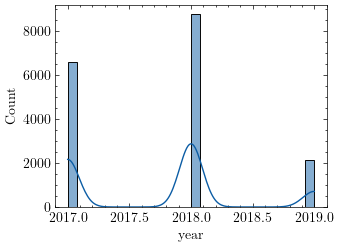

In [76]:
# plot the distribution of "year"
sns.histplot(df_ams_weather['year'],kde=True)

### Explore HoD

<Axes: xlabel='HoD', ylabel='Count'>

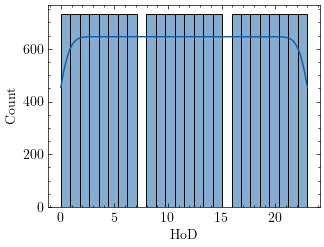

In [77]:
# plot the distribution of "HoD"
sns.histplot(df_ams_weather['HoD'],kde=True)

In [78]:
# check the distribution of "HoD" in a numerical way
df_ams_weather['HoD'].value_counts()

HoD
0     730
1     730
2     730
3     730
4     730
5     730
6     730
7     730
8     730
9     730
10    730
11    730
12    730
13    730
14    730
15    730
16    730
17    730
18    730
19    730
20    730
21    730
22    730
23    730
Name: count, dtype: int64

### Explore wind_speed

<Axes: xlabel='wind_speed', ylabel='Count'>

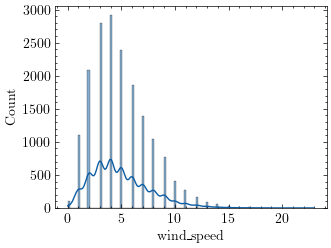

In [79]:
# plot the distribution of "wind_speed"
sns.histplot(df_ams_weather['wind_speed'],kde=True)

### Explore temperature

<Axes: xlabel='temperature', ylabel='Count'>

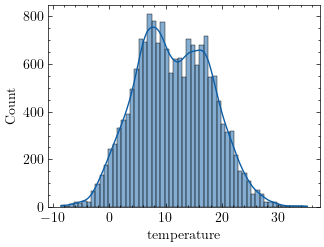

In [80]:
# plot the distribution of "temperature"
sns.histplot(df_ams_weather['temperature'],kde=True)

### Explore irradiance

<Axes: xlabel='irradiance', ylabel='Count'>

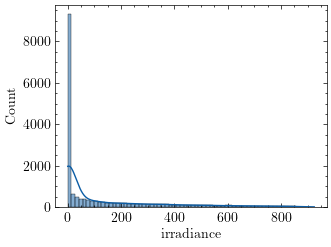

In [81]:
# plot the distribution of "irradiance"
sns.histplot(df_ams_weather['irradiance'],kde=True)

In [82]:
# check the distribution of "irradiance" in a numerical way
df_ams_weather['irradiance'].value_counts()

irradiance
0.000000      8210
2.777778       387
5.555556       274
8.333333       158
16.666667      152
              ... 
886.111111       1
916.666667       1
925.000000       1
919.444444       1
911.111111       1
Name: count, Length: 328, dtype: int64

### Explore precipitation

<Axes: xlabel='precipitation', ylabel='Count'>

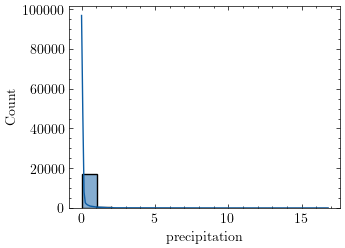

In [83]:
# plot the distribution of "precipitation"
sns.histplot(df_ams_weather['precipitation'],kde=True)

In [84]:
# check the distribution of "precipitation" in a numerical way
df_ams_weather['precipitation'].value_counts()

precipitation
0.0000    13666
0.0025     1882
0.1000      503
0.2000      279
0.3000      198
          ...  
9.9000        1
6.3000        1
9.8000        1
6.2000        1
4.7000        1
Name: count, Length: 71, dtype: int64

### Explore cloud_cover

<Axes: xlabel='cloud_cover', ylabel='Count'>

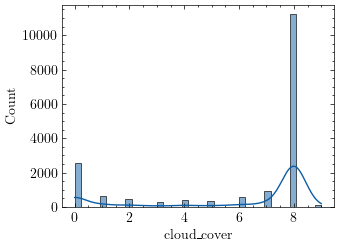

In [85]:
# plot the distribution of "cloud_cover"
sns.histplot(df_ams_weather['cloud_cover'],kde=True)

In [86]:
# check the distribution of "cloud_cover" in a numerical way
df_ams_weather['cloud_cover'].value_counts()

cloud_cover
8    11207
0     2583
7      920
1      636
6      601
2      455
4      412
5      324
3      266
9      116
Name: count, dtype: int64

In [87]:
df_ams_weather.describe()

,datetime,HoD,dow,doy,month,year,wind_speed,temperature,irradiance,precipitation,cloud_cover
count,17520,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2018-03-31 23:30:00,11.500000,3.006849,183.000000,6.526027,2017.746575,4.882192,11.421535,125.701738,0.085622,6.070662
min,2017-04-01 00:00:00,0.000000,0.000000,1.000000,1.000000,2017.000000,0.000000,-8.600000,0.000000,0.000000,0.000000
25%,2017-09-30 11:45:00,5.750000,1.000000,92.000000,4.000000,2017.000000,3.000000,6.500000,0.000000,0.000000,5.000000
50%,2018-03-31 23:30:00,11.500000,3.000000,183.000000,7.000000,2018.000000,4.000000,11.200000,5.555556,0.000000,8.000000
75%,2018-09-30 11:15:00,17.250000,5.000000,274.000000,10.000000,2018.000000,6.000000,16.500000,183.333333,0.000000,8.000000
max,2019-03-31 23:00:00,23.000000,6.000000,365.000000,12.000000,2019.000000,23.000000,35.200000,925.000000,16.800000,9.000000
std,NaN,6.922384,2.001757,105.369036,3.447950,0.660152,2.703965,6.675349,202.591146,0.480093,3.089680


## Normalize the weather data

In [88]:
# using MinMaxScaler, normalize irradiance,temperature, precipitation, wind_speed, and cloud_cover
scaler = MinMaxScaler()
df_ams_weather[['temperature_norm','precipitation_norm','wind_speed_norm','cloud_cover_norm']] = scaler.fit_transform(df_ams_weather[['temperature','precipitation','wind_speed','cloud_cover']])
# Normalize irradiance by dividing by 1000
df_ams_weather['irradiance_norm']=df_ams_weather['irradiance']/1000

In [89]:
df_ams_weather.describe()

,datetime,HoD,dow,doy,month,year,wind_speed,temperature,irradiance,precipitation,cloud_cover,temperature_norm,precipitation_norm,wind_speed_norm,cloud_cover_norm,irradiance_norm
count,17520,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2018-03-31 23:30:00,11.500000,3.006849,183.000000,6.526027,2017.746575,4.882192,11.421535,125.701738,0.085622,6.070662,0.457113,0.005097,0.212269,0.674518,0.125702
min,2017-04-01 00:00:00,0.000000,0.000000,1.000000,1.000000,2017.000000,0.000000,-8.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017-09-30 11:45:00,5.750000,1.000000,92.000000,4.000000,2017.000000,3.000000,6.500000,0.000000,0.000000,5.000000,0.344749,0.000000,0.130435,0.555556,0.000000
50%,2018-03-31 23:30:00,11.500000,3.000000,183.000000,7.000000,2018.000000,4.000000,11.200000,5.555556,0.000000,8.000000,0.452055,0.000000,0.173913,0.888889,0.005556
75%,2018-09-30 11:15:00,17.250000,5.000000,274.000000,10.000000,2018.000000,6.000000,16.500000,183.333333,0.000000,8.000000,0.573059,0.000000,0.260870,0.888889,0.183333
max,2019-03-31 23:00:00,23.000000,6.000000,365.000000,12.000000,2019.000000,23.000000,35.200000,925.000000,16.800000,9.000000,1.000000,1.000000,1.000000,1.000000,0.925000
std,NaN,6.922384,2.001757,105.369036,3.447950,0.660152,2.703965,6.675349,202.591146,0.480093,3.089680,0.152405,0.028577,0.117564,0.343298,0.202591


In [90]:
df_ams_weather.to_csv('../data/nl/ams_data_weather_processed.csv', index=False)

# Monthly irradiance

In [91]:
df_ams_weather.columns

Index(['datetime', 'HoD', 'dow', 'doy', 'month', 'year', 'wind_speed',
       'temperature', 'irradiance', 'precipitation', 'cloud_cover',
       'temperature_norm', 'precipitation_norm', 'wind_speed_norm',
       'cloud_cover_norm', 'irradiance_norm'],
      dtype='object')

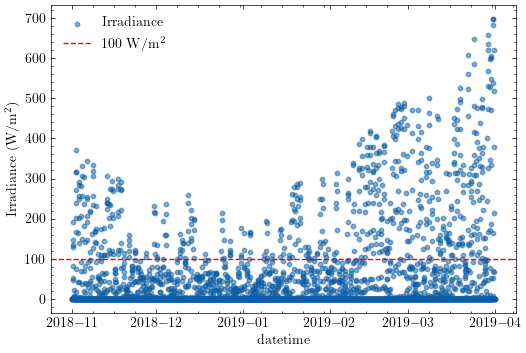

In [100]:
# plot the irradiance from 2018 Nov to 2019 Mar
fig, ax = plt.subplots(figsize=(6, 4))
df_ams_weather[df_ams_weather['datetime']>'2018-11-01'].plot(kind='scatter',x='datetime',y='irradiance',ax=ax,alpha=0.5,s=10,label='Irradiance')
# y label
ax.set_ylabel('Irradiance ($\mathrm{W/m^2}$)')
# add a horizontal line where y=100
plt.axhline(y=100, color='red', linestyle='--',label='100 $\mathrm{W/m^2}$')
plt.legend()
plt.savefig('../figs/ams_irradiance_winter.pdf',format='pdf')
plt.show()